In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
list_csv_names_broncos =[
    'Broncos_Pre_Game1_Cowboys.csv',
    'Broncos_Pre_Game2_Bills.csv',
    'Broncos_Pre_Game3_Vikings.csv',
    'Broncos_Game1_Seahawks.csv',
    'Broncos_Game2_Texans.csv',
    'Broncos_Game3_49ers.csv',
    'Broncos_Game4_Raiders.csv',
    'Broncos_Game5_Colts.csv',
    'Broncos_Game6_Chargers.csv',
    'Broncos_Game7_Jets.csv',
    'Broncos_Game8_Jaguars.csv',
    'Broncos_Game9_Titans.csv'
]
list_csv_names_eagles =[
    'Eagles_Pre_Game1_Jets.csv',
    'Eagles_Pre_Game2_Browns.csv',
    'Eagles_Pre_Game3_Dolphins.csv',
    'Eagles_Game1_Lions.csv',
    'Eagles_Game2_Vikings.csv',
    'Eagles_Game3_Washington.csv',
    'Eagles_Game4_Jaguars.csv',
    'Eagles_Game5_Cardinals.csv',
    'Eagles_Game6_Cowboys.csv',
    'Eagles_Game7_Steelers.csv',
    'Eagles_Game8_Texans.csv',
    'Eagles_Game9_Colts.csv'
]

In [3]:
import os
paths_broncos = [os.path.join('C:/Users/littl/CU_2022_Fall/Data_Mining/Project/Broncos CSV', csv_name) for csv_name in list_csv_names_broncos]
paths_eagles = [os.path.join('C:/Users/littl/CU_2022_Fall/Data_Mining/Project/Eagles CSV', csv_name) for csv_name in list_csv_names_eagles]

Setup dataframes for Bronco games

In [4]:
list_broncos_dfs = [pd.read_csv(path) for path in paths_broncos]

In [5]:
len(list_broncos_dfs)

12

In [6]:
for df in  list_broncos_dfs:
    df['Date'] = pd.to_datetime(df['Date'])

In [7]:
mega_Broncos_df = pd.concat(list_broncos_dfs)

Setup datframes for Eagle games

In [8]:
list_eagles_dfs = [pd.read_csv(path) for path in paths_eagles]

In [9]:
len(list_eagles_dfs)

12

In [10]:
for df in  list_eagles_dfs:
    df['Date'] = pd.to_datetime(df['Date'])

In [11]:
mega_Eagle_df = pd.concat(list_eagles_dfs)

# Numerical EDA

### Broncos EDA

In [56]:
for df in list_broncos_dfs:
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   Unnamed: 0                   1188 non-null   int64              
 1   ID                           1188 non-null   int64              
 2   Date                         1188 non-null   datetime64[ns, UTC]
 3   User                         1188 non-null   object             
 4   Tweet                        1188 non-null   object             
 5   HashTags                     1188 non-null   object             
 6   Likes                        1188 non-null   int64              
 7   Retweets                     1188 non-null   int64              
 8   MentionUsers                 362 non-null    object             
 9   LocationCoordinates          60 non-null     object             
 10  clean_Tweet                  1188 non-null   obj

In [13]:
for df in list_broncos_dfs:
    number_unique_users = df['User'].nunique()
    number__unique_tweets = df['ID'].nunique()
    print(f"number of unique users in this dataframe: {number_unique_users}, number of unique tweets: {number__unique_tweets}")

number of unique users in this dataframe: 443, number of unique tweets: 1188
number of unique users in this dataframe: 354, number of unique tweets: 944
number of unique users in this dataframe: 273, number of unique tweets: 796
number of unique users in this dataframe: 2404, number of unique tweets: 4220
number of unique users in this dataframe: 1349, number of unique tweets: 2916
number of unique users in this dataframe: 1895, number of unique tweets: 3647
number of unique users in this dataframe: 1116, number of unique tweets: 2471
number of unique users in this dataframe: 611, number of unique tweets: 1130
number of unique users in this dataframe: 2386, number of unique tweets: 4363
number of unique users in this dataframe: 1108, number of unique tweets: 2381
number of unique users in this dataframe: 1382, number of unique tweets: 2788
number of unique users in this dataframe: 746, number of unique tweets: 1851


In [38]:
for df in list_broncos_dfs:
    print(df.groupby(['User']).size().sort_values(ascending=False).head(10))
    print(df.shape[0], '\n')

User
BroncosViews      222
TroyRenck          69
SportsWhiplash     49
9NEWSSports        28
MileHighHuddle     22
MileHighSports     17
BroncosOnScout     16
redwardsradio      16
GeorgeStoia        15
ThomasHallNFL      15
dtype: int64
1188 

User
BroncosViews       179
TroyRenck           49
ThomasHallNFL       25
MileHighHuddle      25
MileHighSports      22
GurlThatj           18
ryanohalloran       18
BroncosOnScout      15
GageMadridNFL       12
LukePattersonLP     12
dtype: int64
944 

User
BroncosViews      178
TroyRenck          65
ThomasHallNFL      23
MileHighHuddle     17
9NEWSSports        16
BroncosOnScout     15
TheBroncosWire     13
MileHighSports     11
MileHighReport     11
GeorgeStoia        11
dtype: int64
796 

User
BroncosViews       225
TroyRenck           81
GeorgeStoia         36
jamesmerilatt       29
ronNcaphill         27
CecilLammey         24
PostBroncos         23
KelbermanNFL        21
DPostSports         20
BeWrongAllAlong     20
dtype: int64
4220 

Us

In [24]:
mega_Broncos_df.groupby(['User']).size().sort_values(ascending=False).head(10)

User
BroncosViews      2720
TroyRenck          866
GeorgeStoia        235
RichKurtzman       235
MileHighSports     230
MileHighHuddle     208
ParkerJGabriel     199
ronNcaphill        173
CodyRoarkNFL       155
PostBroncos        149
dtype: int64

In [32]:
mega_Broncos_df.loc[(mega_Broncos_df['Positive_Sentiment'] == True)].shape[0]/mega_Broncos_df.shape[0]

0.5787419411047221

### Eagles EDA

In [35]:
for df in list_eagles_dfs:
    number_unique_users = df['User'].nunique()
    number__unique_tweets = df['ID'].nunique()
    print(f"number of unique users in this dataframe: {number_unique_users}, number of unique tweets: {number__unique_tweets}")

number of unique users in this dataframe: 1074, number of unique tweets: 2504
number of unique users in this dataframe: 600, number of unique tweets: 1445
number of unique users in this dataframe: 517, number of unique tweets: 1156
number of unique users in this dataframe: 2852, number of unique tweets: 6489
number of unique users in this dataframe: 3552, number of unique tweets: 6325
number of unique users in this dataframe: 3007, number of unique tweets: 6540
number of unique users in this dataframe: 2477, number of unique tweets: 5285
number of unique users in this dataframe: 2510, number of unique tweets: 4979
number of unique users in this dataframe: 3454, number of unique tweets: 5928
number of unique users in this dataframe: 2310, number of unique tweets: 4436
number of unique users in this dataframe: 3346, number of unique tweets: 6340
number of unique users in this dataframe: 3677, number of unique tweets: 6721


In [39]:
for df in list_eagles_dfs:
    print(df.groupby(['User']).size().sort_values(ascending=False).head(10))
    print(df.shape[0], '\n')

User
PhilEaglesViews    265
PalaceNews_365     100
JeffKerrCBS         54
kracze              52
Mfranknfl           47
TheEaglesAddict     41
EliotShorrParks     37
DaveMReports        34
Jeff_McLane         34
Glory_World1        31
dtype: int64
2504 

User
PhilEaglesViews    172
PalaceNews_365      70
kracze              41
JCTSports           40
JeffKerrCBS         30
Jeff_McLane         29
EJSmith94           27
DanSileoShow        23
EliotShorrParks     21
Mfranknfl           20
dtype: int64
1445 

User
PhilEaglesViews    143
PalaceNews_365      64
Jeff_McLane         22
JFMcMullen          22
EliotShorrParks     18
kracze              17
JCTSports           16
TheEaglesAddict     14
DaveMReports        14
agubaske            14
dtype: int64
1156 

User
PhilEaglesViews    403
EliotShorrParks    128
JeffKerrCBS         66
Mfranknfl           61
EJSmith94           59
Jeff_McLane         59
kracze              58
Beardaknowledge     49
TheEaglesAddict     43
Ryan_Messick        42


In [41]:
mega_Eagle_df.groupby(['User']).size().sort_values(ascending=False).head(10)

User
PhilEaglesViews    3133
EliotShorrParks     780
PalaceNews_365      610
JeffKerrCBS         588
Jeff_McLane         503
kracze              483
Mfranknfl           468
EJSmith94           430
JCTSports           423
TheEaglesAddict     364
dtype: int64

In [43]:
mega_Eagle_df.loc[(mega_Eagle_df['Positive_Sentiment'] == True)].shape[0]/mega_Eagle_df.shape[0]

0.617682465433033

Remove users that concentrate data and dont represent fan base

In [84]:
def remove_users_from_df(df, list_users):
    indxs = df[df['User'].isin(list_users)].index
    df.drop(indxs, inplace=True)
    return df

In [86]:
b_game_1 = list_broncos_dfs[0]
users = b_game_1.groupby(['User']).size().sort_values(ascending=False).head(5)
print(users)
l = list(users.index.values) 
b_game_1 = remove_users_from_df(b_game_1,l)
b_game_1.groupby(['User']).size().sort_values(ascending=False).head(5)

User
MileHighSports    17
BroncosOnScout    16
redwardsradio     16
GeorgeStoia       15
ThomasHallNFL     15
dtype: int64


User
ronNcaphill       14
TheBroncosWire    13
RichKurtzman      13
lionelbienvenu    12
KOAColorado       10
dtype: int64

# Visual EDA

In [87]:
b_game_1 = list_broncos_dfs[0]

In [102]:
b_game_1.head()

,Unnamed: 0,ID,Date,User,Tweet,HashTags,Likes,Retweets,MentionUsers,LocationCoordinates,clean_Tweet,NLTK_Sentiment_Analysis,TextBlob_Sentiment_Analysis,Compound_Sentiment_Score,Positive_Sentiment
2,2,1558964384021487616,2022-08-14 23:50:47+00:00,The_Coach_A,.#Broncos did this several times vs the #Cowbo...,"['Broncos', 'Cowboys', 'ArtofX', 'NFL']",75,8,NaN,NaN,several times vs tes bead wz going moved edge ...,0.3818,0.000000,0.381800,True
3,3,1558963674597007361,2022-08-14 23:47:58+00:00,Mints2u29,Welcome 2 the Farm Bryan Station Defenders #tr...,"['trUSt22', 'Broncos', 'Discipline']",29,5,"[User(username='FDouglassFB', id=8218028561939...",NaN,welcome 2 farm bryan station defenders 2000 wi...,0.9552,0.800000,1.755200,True
6,7,1558961500160663553,2022-08-14 23:39:20+00:00,CruisinCanadian,📷 This new Ford Bronco Badlands has some aweso...,"['bronco', 'badlands', 'bronconation', 'bronco...",0,0,NaN,NaN,new ford bronco badlands awesome mods way next...,0.6249,0.378788,1.003688,True
9,10,1558958362708025345,2022-08-14 23:26:52+00:00,lionelbienvenu,a #Nuggets home game on Christmas day. The #Br...,"['Nuggets', 'Broncos', 'LAChargers']",3,0,"[User(username='DenverChannel', id=8731312, di...",NaN,home game christmas day 12 25 gt,0.2732,-0.400000,-0.126800,False
12,17,1558953359972765696,2022-08-14 23:06:59+00:00,Kit_R_C_Realty,Nothing like watching the Broncos womp the Cow...,"['BroncosCountry', 'Colorado']",4,1,NaN,NaN,nothing like watching broncos womp cowboys enj...,0.3160,0.500000,0.816000,True


In [93]:
def make_scatter_and_pie_figure(df,fig_name,save=False):
    fig, axes = plt.subplots(2, 1, figsize=(15, 10))
    sns.set_style('whitegrid')
    #scatter
    sns.scatterplot(ax=axes[0],x=df['Date'],y=df["Compound_Sentiment_Score"],hue=df['Positive_Sentiment'])
    axes[0].set_title('Positive and Negative Sentiment Socores over Time Scatter Plot',fontsize=12)
    #pie
    true = len(df.loc[(df['Positive_Sentiment']==True)])
    false = len(df.loc[(df['Positive_Sentiment']==False)])
    axes[1].pie([false,true],labels=["Negative",'Positive'])
    axes[1].set_title('Pie Plot of Sentiment Labels',fontsize=12)
    fig.suptitle(fig_name, fontsize=20)
    if save: #save the figure
        plt.savefig(fig_name)

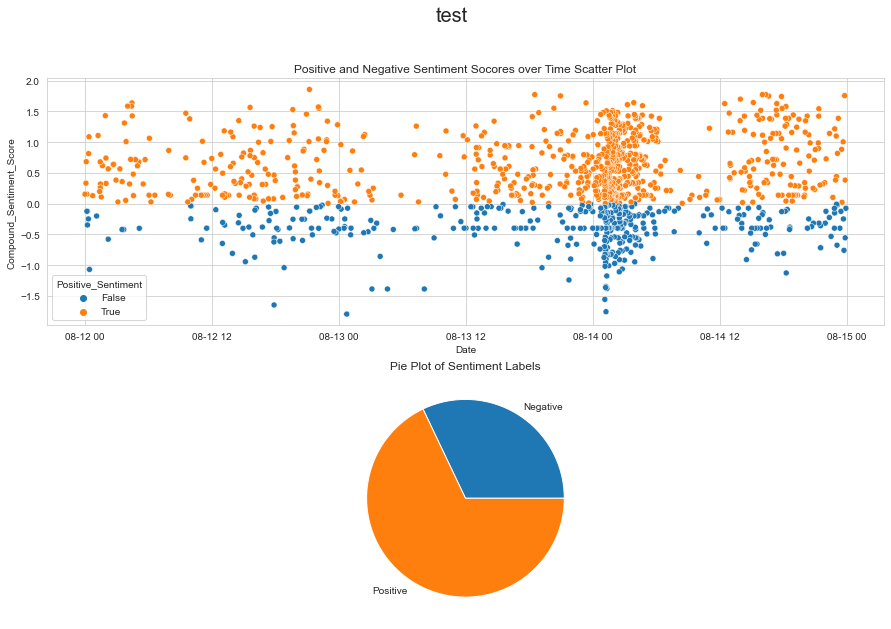

In [55]:
make_scatter_and_pie_figure(b_game_1,"test")

In [103]:
df_range = b_game_1.loc[b_game_1["Date"].between("2022-08-13 12:00:00", "2022-08-14 12:00:00")]
df_range

,Unnamed: 0,ID,Date,User,Tweet,HashTags,Likes,Retweets,MentionUsers,LocationCoordinates,clean_Tweet,NLTK_Sentiment_Analysis,TextBlob_Sentiment_Analysis,Compound_Sentiment_Score,Positive_Sentiment
193,269,1558785506380394497,2022-08-14 12:00:00+00:00,ByJonHeath,#Broncos have 'no immediate plans' to add Peyt...,['Broncos'],4,0,NaN,NaN,immediate plans add peyton manning john elway ...,0.0000,0.068182,0.068182,True
200,280,1558766892839485444,2022-08-14 10:46:02+00:00,raw_chili,[Rothschild] Excuse the poor cell phone video ...,"['AmericanFootballConference', 'AmericanFootba...",0,0,"[User(username='Broncos', id=18734310, display...",NaN,excuse poor cell phone video nate hackett running,-0.4215,-0.225000,-0.646500,False
201,281,1558766863609380865,2022-08-14 10:45:55+00:00,BaxFootballGuru,25 days until 2022 #NFL season opener (#Bills ...,"['NFL', 'Bills', 'Rams', 'Chiefs', 'Broncos', ...",1,1,"[User(username='JulesForTheBlue', id=276813746...",NaN,25 days 2022 season opener primary rb jamaal c...,0.0000,0.200000,0.200000,True
202,282,1558765581612072960,2022-08-14 10:40:49+00:00,PresshubU,Broncos #Broncos Briefs: Russell Wilson lauds...,['Broncos'],0,0,NaN,NaN,broncos briefs russell wilson lauds diversity ...,0.0000,0.136364,0.136364,True
205,287,1558756118444253188,2022-08-14 10:03:13+00:00,RCJHDB4L,"@TheBroncosWire Speaking of Ja'Wuan James, wha...",['Broncos'],1,0,"[User(username='TheBroncosWire', id=4728625575...",NaN,speaking jawuan james happened grievance filed,-0.4767,0.000000,-0.476700,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,1334,1558435565694902272,2022-08-13 12:49:27+00:00,fishsports,Panic vs. Patience: #Cowboys NOTES at #Broncos...,"['Cowboys', 'Broncos']",8,3,"[User(username='richiewhitt', id=17636490, dis...",NaN,panic vs patience notes via,-0.5106,0.000000,-0.510600,False
910,1337,1558433673598443521,2022-08-13 12:41:56+00:00,DCtoker,And its preseason game 1 for my Broncos \n#Bro...,['BroncosCountry'],0,0,NaN,NaN,preseason game 1 broncos,0.0000,-0.400000,-0.400000,False
911,1338,1558433655068004352,2022-08-13 12:41:52+00:00,KevDanNFL,Don't forget to tune in to @DenverChannel this...,"['Broncos', 'OrangeWeekly', 'FansBrewsandBronc...",0,0,"[User(username='DenverChannel', id=8731312, di...",NaN,dont forget tune morning 7 9am see talk football,0.1695,0.000000,0.169500,True
914,1342,1558425433674235904,2022-08-13 12:09:12+00:00,BlueridgeBronc1,And Zach absolutely BODYSLAMS his final articl...,['Broncos'],4,1,"[User(username='Zach_Segars', id=9058297872640...",NaN,zach absolutely bodyslams final article traini...,0.8020,0.233333,1.035333,True


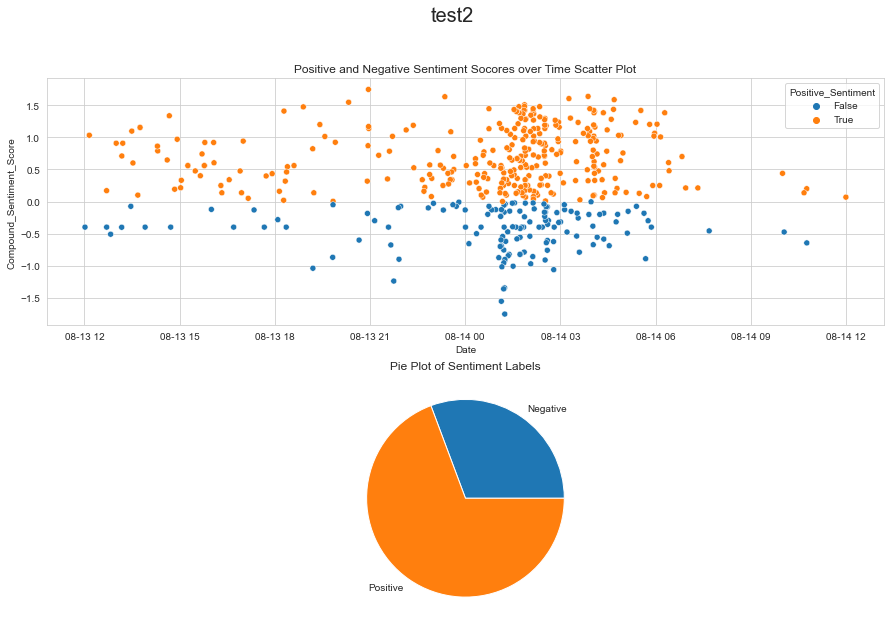

In [104]:
make_scatter_and_pie_figure(df_range,"test2")